In [1]:
import pandas as pd
import numpy as np
import random as rand
import importlib 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
%matplotlib inline

In [ ]:
# data can be found here: https://www.kaggle.com/nyctaxi/yellow-taxis
raw = pd.read_csv("yellow-taxis/1january.csv")

In [3]:
# delete unused columns
# del raw['trip_distance']
del raw['passenger_count']
del raw['fare_amount']
del raw['tolls_amount']
del raw['taxes_amount']
del raw['tip_amount']
# del raw['payment_amount']
del raw['payment_type']

In [12]:
# convert pickup_dtatetime to datetime
raw["pickup_datetime"] = pd.to_datetime(raw["pickup_datetime"])
raw["dropoff_datetime"] = pd.to_datetime(raw["dropoff_datetime"])
raw = raw[(raw["pickup_longitude"] > -80) & (raw["pickup_longitude"] < -60)
            & (raw["dropoff_longitude"] > -80) & (raw["dropoff_longitude"] < -60)
            & (raw["pickup_latitude"] > 30) & (raw["pickup_latitude"] < 50)
            & (raw["dropoff_latitude"] > 30) & (raw["dropoff_latitude"] < 50)]
raw = raw.sample(frac=1)
raw = raw.reset_index(drop=True)
raw

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,dropoff_datetime,dropoff_latitude,dropoff_longitude,payment_amount
0,2016-01-26 19:47:52,40.76357,-73.97221,7.51,2016-01-26 20:25:38,40.69215,-73.99644,36.30
1,2016-01-23 00:41:51,40.74850,-73.98820,2.30,2016-01-23 00:56:27,40.72040,-73.99655,14.76
2,2016-01-11 13:25:07,40.75430,-73.96580,0.60,2016-01-11 13:28:03,40.75392,-73.97177,4.80
3,2016-01-25 13:59:23,40.77782,-73.95911,1.08,2016-01-25 14:05:26,40.78326,-73.97076,8.76
4,2016-01-10 19:51:23,40.73951,-74.00812,5.48,2016-01-10 20:07:15,40.78746,-73.96786,19.80
5,2016-01-22 15:42:43,40.76919,-73.95490,0.70,2016-01-22 15:47:18,40.77655,-73.94962,6.80
6,2016-01-01 22:39:48,40.78297,-73.97407,1.66,2016-01-01 22:45:51,40.77760,-73.95200,9.30
7,2016-01-26 21:00:13,40.75164,-73.99379,22.22,2016-01-26 21:41:17,40.96364,-73.81642,117.84
8,2016-01-14 10:00:00,40.75176,-73.97858,0.44,2016-01-14 10:02:41,40.74670,-73.98153,5.76
9,2016-01-15 16:35:26,40.76838,-73.95641,3.30,2016-01-15 16:54:39,40.73828,-73.98787,16.80


In [5]:
#make sure types are okay
print(list(raw.columns.values))
print([raw[i].dtype for i in list(raw.columns.values)])

['pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'trip_distance', 'dropoff_datetime', 'dropoff_latitude', 'dropoff_longitude', 'payment_amount']
[dtype('<M8[ns]'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('<M8[ns]'), dtype('float64'), dtype('float64'), dtype('float64')]


In [6]:
#convert it to a numpy matrix
#np_raw = raw.as_matrix()

In [7]:
#print(np_raw.dtype)
print(raw.ix[0])
print(len(raw))

pickup_datetime      2016-01-03 11:53:35
pickup_latitude                  40.7601
pickup_longitude                -73.9675
trip_distance                        3.5
dropoff_datetime     2016-01-03 12:06:47
dropoff_latitude                  40.725
dropoff_longitude               -73.9984
payment_amount                      18.3
Name: 0, dtype: object
10720815


In [13]:
import State as State
importlib.reload(State)

class MarkovChain:
    # num centers are we picking for k-means
    def __init__(self, raw, k, epsilon = 1e-12):
        self.state_set = set()
        self.id_to_state = {}
        self.adj_matrix = None
        self.raw = raw
        self.k = k

        self.initialize_centers(k)

        self.build_states_kmeans(1000, epsilon)

        self.add_points_edges()
        self.make_adjacency_matrix()

    def initialize_centers(self, k):
        ind = [i for i in range(len(self.raw))]
#         rand.shuffle(ind)
        centers = ind[:k]
        # initialize centers
        ident = 0
        for c_ind in centers:
            # out of convenience, we aren't messing with pickup lat lon
            lat = self.raw.ix[c_ind]["pickup_latitude"]
            lon = self.raw.ix[c_ind]["pickup_longitude"]
            s = State.State((lat, lon), ident)
            self.state_set.add(s)
            self.id_to_state[ident] = s
            ident += 1

    def build_states_kmeans(self, iterations, epsilon):
        # run kmeans algorithm
        min_diff = 1e6
        while iterations > 0 and min_diff > epsilon:
            for ind, row in self.raw.iterrows():
                pos_start, pos_end = self.row_to_positions(row)
                closest_to_start = self.find_closest_state(pos_start)
                closest_to_end = self.find_closest_state(pos_end)

                closest_to_start.add_position(pos_start)
                closest_to_end.add_position(pos_end)
            max_diff = 0
            for s in self.state_set:
                max_diff = max(max_diff, s.update_center())
            min_diff = min(min_diff, max_diff)
            iterations -= 1

    def add_points_edges(self):
        for s in self.state_set:
            s.clear_stored_data()
        for ind, row in self.raw.iterrows():
            pos_start, pos_end = self.row_to_positions(row)
            closest_to_start = self.find_closest_state(pos_start)
            closest_to_end = self.find_closest_state(pos_end)

            fare = self.row_to_fare(row)
            duration = self.row_to_trip_duration_seconds(row)
            tdistance = self.row_to_distance(row)

            #Add points to respective states
            closest_to_start.store_data(pos_start)
            closest_to_end.store_data(pos_end)

            ##Add this edge to markov state
            closest_to_start.add_destination(closest_to_end.id, fare, duration)


    def make_adjacency_matrix(self):
        self.adj_matrix = np.ndarray(shape=(len(self.state_set), len(self.state_set)), dtype=float, order='C')
        for i in sorted(self.id_to_state.keys()):
            for j in sorted(self.id_to_state.keys()):
                self.adj_matrix[i][j] = self.transition_probability(i, j)

    def sum_of_square_error(self):
        total = 0
        for s in self.state_set:
            total += s.sum_of_squared_errors
        return total


#     def random_walk_given_time_cap(self, start_id, duration_cap):
#         while

    def random_walk(self, start_id, walk_length):
        total_duration = 0
        total_fare = 0
        states_visited = []
        next_id = start_id
        for i in range(walk_length):
            states_visited.append(next_id)
            s = self.get_state(next_id)
            next_id, fare, duration = s.next_state()
            total_fare += fare
            total_duration += duration
        return states_visited, total_fare, total_duration

    def random_walk_simulator(self, num_of_simulations=100, walk_length=10):
        average_fare_by_state = []
        average_duration_by_state = []
        for state_id in range(self.k):
            list_of_random_walks = []
            for _ in range(num_of_simulations):
                random_walk_simulation = self.random_walk(state_id, walk_length)
                list_of_random_walks.append(random_walk_simulation)
            total_fare = sum([walk[1] for walk in list_of_random_walks])
            average_fare = total_fare / num_of_simulations
            average_fare_by_state.append(average_fare)
            total_duration = sum([walk[2] for walk in list_of_random_walks])
            average_duration = total_duration / num_of_simulations
            average_duration_by_state.append(average_fare)
        return average_fare_by_state, average_duration_by_state

    def traveling_salesman(self, start_id):
        total_duration = 0
        total_fare = 0
        states_visited = []
        next_id = start_id
        need_to_visit = set(self.id_to_state.keys()[:])
        need_to_visit.remove(start_id)
        while(len(need_to_visit)):
            states_visited.append(next_id)
            s = self.get_state(next_id)
            next_id, fare, duration = s.next_state()
            total_fare += fare
            total_duration += duration
            need_to_visit.remove(next_id)
        return states_visited, len(states_visited), total_fare, total_duration
    
    def traveling_salesman_simulator(self, num_of_simulations=100):
        average_number_of_states_by_state = []
        average_duration_by_state = []
        for state_id in range(self.k):
            for _ in range(num_of_simulations):
                states_visited, number_of_states_visited, fare, duration = self.traveling_salesman(state_id)
                total_number_of_states += number_of_states_visited
#                 total_fare += fare
                total_duration += duration
            average_number_of_states = total_number_of_states / num_of_simulations
            average_number_of_states_by_state.append(average_number_of_states)
            average_duration = total_duration / num_of_simulations
            average_duration_by_state.append(average_duration)
        return average_number_of_states_by_state, average_duration_by_state

    ##
    # GETTERS
    ##
    def get_invariant(self):
        adjm = self.get_adjacency_matrix()
        S, U = np.linalg.eig(adjm.T)
        inv_dist = U.T[0]
        norm_inv_dist = inv_dist / float(sum(inv_dist))
        return norm_inv_dist

    def get_state(self, iden):
        return self.id_to_state[iden]

    def get_state_set(self):
        return self.state_set

    def get_adjacency_matrix(self):
        return self.adj_matrix

    ###
    # HELPER METHODS
    ###
    def find_closest_state(self, pos):
        def distance(state, pos):
            clat, clon = state.center
            return float(((clat - pos[0])**2 + (clon - pos[1])**2))**0.5
        closest = None
        min_dist = None
        for state in self.state_set:
            d = distance(state, pos)
            if closest == None or d < min_dist:
                closest = state
                min_dist = d
        assert(closest != None)
        return closest

    def row_to_positions(self, row):
        lats = row["pickup_latitude"]
        lons = row["pickup_longitude"]
        pos_start = (lats, lons)

        late = row["dropoff_latitude"]
        lone = row["dropoff_longitude"]
        pos_end = (late, lone)

        return pos_start, pos_end

    def row_to_fare(self, row):
        return row["payment_amount"]
    def row_to_distance(self, row):
        return row["trip_distance"]
    def row_to_trip_duration_seconds(self, row):
        diff = row["pickup_datetime"] - row["dropoff_datetime"]
        return diff.total_seconds()


    def transition_probability(self, i, j):
        return self.id_to_state[i].probability_to(j)


In [64]:
def find_optimal_k(raw, k_list):
    x = []
    y = []
    k_dict = {}
    for k in k_list:
        print("k: " + str(k))
        if k not in k_dict:
            k_dict[k] = []
        try:
            m = MarkovChain(raw, k)
            x.append(k)
#             y.append()
#             total.append((k, m.sum_of_square_error()))
            y.append(m.sum_of_square_error())
        except ZeroDivisionError:
            print("hello")
    return x, y

In [67]:
k_list=[i for i in range(5, 50)]
def find_optimal_k_simulator(raw, k_list, num_iter):
    all_points = []
    for i in range(num_iter):
        print("iter: " + str(i))
        raw = raw.sample(frac=1)
        raw = raw.reset_index(drop=True)
        x, y = find_optimal_k(raw, k_list)
        all_points.append((x, y))
    return all_points

start = datetime.datetime.now()
all_points = find_optimal_k_simulator(raw[:1000], [i for i in range(5, 50)], 20)
end = datetime.datetime.now()
print(start - end)

# x, y = find_optimal_k(raw, k_list=[i for i in range(5, 50)])

iter: 0
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
iter: 1
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
hello
k: 45
hello
k: 46
k: 47
k: 48
k: 49
iter: 2
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
iter: 3
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 3

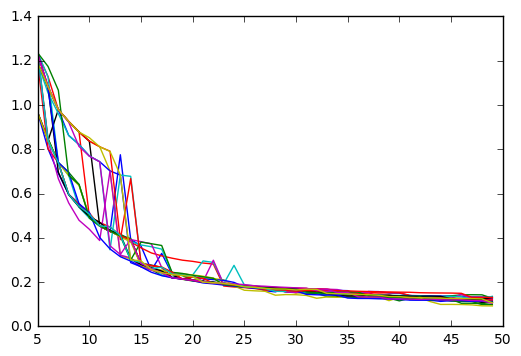

In [68]:
for pt in all_points:
    plt.plot(pt[0], pt[1])
# plt.plot(x, y)

In [70]:
def average_out_all_points(all_points):
    total_dict = {}
    for pt in all_points:
        allx = pt[0][:]
        ally = pt[1][:]
        assert(len(allx) == len(ally))
        for i in range(len(allx)):
            x = allx[i]
            y = ally[i]
            if x not in total_dict:
                total_dict[x] = []
            total_dict[x].append(y)

    for k, v in total_dict.items():
        total_dict[k] = sum(v)/float(len(v))
    
    x = []
    y = []
    for k in sorted(total_dict.keys()):
        x.append(k)
        y.append(total_dict[k])
    return x, y

avg_x, avg_y = average_out_all_points(all_points)

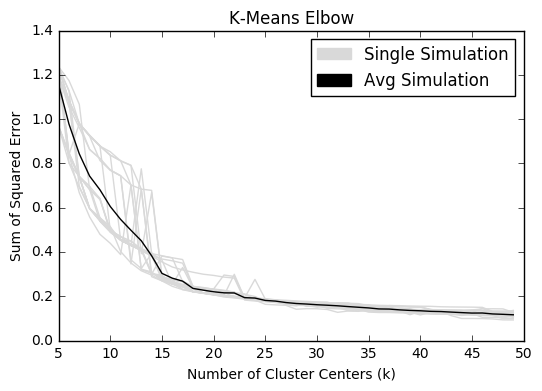

In [92]:
# K-MEANS ELBOW PLOT CODE
fig = plt.figure()
for pt in all_points:
    plt.plot(pt[0], pt[1], color="0.85")
plt.plot(avg_x, avg_y, color="k")
plt.title("K-Means Elbow")
plt.ylabel("Sum of Squared Error")
plt.xlabel("Number of Cluster Centers (k)")

grey_patch = mpatches.Patch(color="0.85", label="Single Simulation")
black_patch = mpatches.Patch(color="K", label="Avg Simulation")
plt.legend(handles=[grey_patch, black_patch])

fig.savefig('./plots/kmeans_elbow.png', dpi=fig.dpi)

In [26]:
mc = MarkovChain(raw[:5000], 10)

In [27]:
# U is row major
# inv_dist = U.T[0]
# print(inv_dist)

In [28]:
average_fare_by_state, average_duration_by_state = mc.random_walk_simulator(100, 3)

In [29]:
adj = mc.get_adjacency_matrix()

In [30]:
np.sum(adj, axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [31]:
mc.get_invariant()

array([ 0.09075219,  0.14509752,  0.05753995,  0.02057455,  0.05979983,
        0.00746659,  0.06645196,  0.16159817,  0.22931636,  0.16140287])

In [177]:
key_state.stored_data

{(40.7185, -74.00265),
 (40.72175, -74.00435),
 (40.7219, -74.00414),
 (40.72213, -73.9991),
 (40.72269, -74.00663),
 (40.72306, -74.00271),
 (40.723420000000004, -73.9957),
 (40.72347, -74.00325),
 (40.72383, -74.00596999999999),
 (40.72398, -74.0046),
 (40.72466, -74.00191),
 (40.72481, -74.00161999999999),
 (40.72495, -74.00568),
 (40.725640000000006, -73.99524),
 (40.72586, -74.00104),
 (40.72617, -73.99529),
 (40.726409999999994, -74.00565999999999),
 (40.72658, -74.0036),
 (40.72659, -73.99413),
 (40.7266, -74.00233),
 (40.7267, -73.99601),
 (40.72687, -73.99947),
 (40.72755, -74.00548),
 (40.72808, -73.99544),
 (40.72809, -74.00263000000001),
 (40.72811, -73.99546),
 (40.7283, -73.99928),
 (40.72845, -74.00531),
 (40.72862, -73.99461),
 (40.72912, -74.00084),
 (40.729279999999996, -74.00712),
 (40.72929, -73.99774000000001),
 (40.72957, -74.00475),
 (40.72994, -73.99331),
 (40.73052, -73.99320999999999),
 (40.73079, -74.00076),
 (40.73081, -73.99303),
 (40.73121, -74.00471),
 (4

In [13]:
import gmplot
from color_dicts import html_color_codes

In [26]:
####
# Generate a plot of taxi cab pickup and dropoff locations, colored by state 
#    k -- number of states to create
#####

def generate_scatter_plot(filename, k, num_samples=5000):
    gmap = gmplot.GoogleMapPlotter(40.7128, -73.935242, 16)

    colors = list(html_color_codes.keys())
    
    
    m = MarkovChain(raw[:num_samples], k)
    states = m.get_state_set()
    
    for state in states:
        points = state.get_all_points()
        lons = [p[1] for p in points]
        lats = [p[0] for p in points]
        gmap.scatter(lats, lons, colors[state.id], size=40, marker=False)
        gmap.marker(state.center[0], state.center[1], color=colors[state.id])
        
    gmap.draw(filename)

####
# Generate a heat map of the invariant distribution for a MC with k centers
#    k -- number of states to create
#####

def generate_heat_map(filename, k, num_samples=5000):
    hmap = gmplot.GoogleMapPlotter(40.7128, -73.935242, 16)
    
    m = MarkovChain(raw[:num_samples], k)
    states = m.get_state_set()

    invariant_dist = np.array(m.get_invariant()*10000, dtype='int32')
    print(invariant_dist)
    lats = sum([[s.center[0]]*invariant_dist[s.id] for s in states], [])
    lons = sum([[s.center[1]]*invariant_dist[s.id] for s in states], [])

    hmap.heatmap(lats, lons, threshold=1, radius=50, gradient=None, opacity=0.7, dissipating=True)

    hmap.draw(filename)
    
####
# Generate a plot of cluster centers, scaled by the expected fare gained after
# 10 rides by starting at that center.
#    k -- number of states to create
#####

def generate_expected_fares(filename, k, num_samples=5000):
    emap = gmplot.GoogleMapPlotter(40.7128, -73.935242, 16)

    colors = list(html_color_codes.keys())
    
    
    m = MarkovChain(raw[:num_samples], k)
    states = m.get_state_set()
    average_fare_by_state, average_duration_by_state = m.random_walk_simulator(100, 5)
    
    for state in states:
        emap.scatter([state.center[0]], [state.center[1]],
                     colors[state.id], size=average_fare_by_state[state.id]*10, marker=False)
        
    emap.draw(filename)

In [15]:
# make scatter plots for 5, 10, 15, 20, 50 centers

for x in [5, 10, 15, 20, 50]:
    generate_scatter_plot("scattermap_k"+str(x)+".html", x)

In [18]:
# make heatmaps for 5, 10, 15, 20, 50 centers

for x in [15, 20, 50]:
    generate_heat_map("heatmap_k"+str(x)+".html", x, 10000)

[ 851  832  593  480  997  690  480  849  777  229  336 1240   88  935  617]
[741 561 379 413 686 384 330 440 659 232 473 635 186 667 589  86 510 782
 513 723]
[    0     0     0     0     0     0     0     0     0     0 10000     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]


/Users/kayleeburns/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:155: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/kayleeburns/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


In [29]:
# make expected value plots for 5, 10, 15 centers

for x in [5, 10, 15]:
    generate_expected_fares("expected_fares_k"+str(x)+".html", x)

In [30]:
# print invariant distribution for 5, 10, 15, 20, 50 centers

for k in [5, 10, 15, 20, 50]:
    m = MarkovChain(raw[:10000], k)
    print("Invariant distribution when k = ", k, ":")
    print(m.get_invariant())

Invariant distribution when k =  5 :
[ 0.25275619  0.00957723  0.27142258  0.03278347  0.43346052]
Invariant distribution when k =  10 :
[ 0.15090894  0.13375406  0.08535039  0.03336301  0.16076116  0.05194781
  0.06908891  0.22561885  0.06280385  0.02640302]
Invariant distribution when k =  15 :
[ 0.08517992-0.j  0.08324965-0.j  0.05933050-0.j  0.04803811-0.j
  0.09970219-0.j  0.06902737-0.j  0.04807837-0.j  0.08493618-0.j
  0.07772286-0.j  0.02294842-0.j  0.03366233-0.j  0.12406252-0.j
  0.00882144-0.j  0.09352797-0.j  0.06171218-0.j]
Invariant distribution when k =  20 :
[ 0.07417090-0.j  0.05617142-0.j  0.03790608-0.j  0.04132796-0.j
  0.06868788-0.j  0.03847445-0.j  0.03300003-0.j  0.04403668-0.j
  0.06597075-0.j  0.02328127-0.j  0.04734978-0.j  0.06356148-0.j
  0.01867590-0.j  0.06679653-0.j  0.05891179-0.j  0.00861546-0.j
  0.05108995-0.j  0.07825249-0.j  0.05132634-0.j  0.07239285-0.j]
Invariant distribution when k =  50 :
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.

/Users/kayleeburns/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:155: ComplexWarning: Casting complex values to real discards the imaginary part
